# Проект: Исследование стартапов

Проект направлен на исследование данных, касающихся стартапов, с целью помочь финансовой компании оценить перспективность выхода на рынок инвестиций. Основная задача — обработка данных, выявление ключевых факторов, влияющих на успешность стартапов, и предоставление рекомендаций для принятия обоснованных инвестиционных решений.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

**Описание датасетов, которые будут использоваться в проекте:**

1. Описание датасета **acquisition.csv**

Содержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании (компании, которая покупает другую компанию)
- `acquired_company_id` — идентификатор покупаемой компании (компания, которую покупают)
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

2. Описание датасета **company_and_rounds.csv**

Содержит информацию о компаниях и раундах финансирования:
- `company_id` — идентификатор компании.
- `name` — название компании.
- `category_code` — категория области деятельности компании.
- `status` — статус компании.
- `founded_at` — дата инвестирования
- `closed_at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network_username` — ник компании в сети.
- `country_code` — код страны компании.
- `investment_rounds` — число инвестиционных раундов.
- `funding_rounds` — число раундов финансирования.
- `funding_total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding_round_id` — идентификатор этапа финансирования.
- `funded_at` — дата финансирования.
- `funding_round_type` — тип финансирования.
- `raised_amount` — сумма финансирования.
- `pre_money_valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is_first_round` — является ли раунд первым.
- `is_last_round` — является ли раунд последним.

*столбцы `founded at` и `funded at`
- `founded at` - дата, когда компания была основана
- `funded at` - дата, конркетного раунда финансирования

*столбцы `funding total` и `raised amount`
- `funding total` - общая сумма финансирования по всем раундам
- `raised amount` - сумма финансирования в определенном раунде

3. Описание датасета **degrees.csv**

Содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

4. Описание датасета **education.csv**

Содержит информацию об образовании сотрудника:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `institution` — название учебного заведения.
- `graduated_at` — дата получения образования.

5. Описание датасета **fund.csv**

Содержит информацию о фондах:
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

6. Описание датасета **investment.csv**

Содержит информацию о раундах инвестирования:
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — идентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

7. Описание датасета **people.csv**

Содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.


**Связь между датасетами:**
1. Датасеты `acquisition` и `company_and_rounds` связаны по `acquiring_company_id`(идентификатор компании-покупателя) и `company ID`(идентификатор компании), и в таблице `acquisition` приведена более подробная информация о покупке одной компании другой.
2. Датасеты `people` и `degrees` связаны по `id` (идентификатор сотрудника в `people`) и `object_id`(идентификатор сотрудника в `degrees`), и в таблице `degrees` приведен тип образования конкретного сотрудника
3. Датасеты `people` и `education` связаны по `id`(идентификатор сотрудника в `people`) и `person_id`(идентификатор сотрудника в `education`), и в таблице `education` приведена подробная информация об образовании определенного сотрудника
4. Датасеты `company_and_rounds` и `investment` связаны по `funding round id` и `id`, соответсвенно, и в таблице `investment` представлена более подробная информация о каждом раунде инвестирования
5. Датасеты `investment` и `fund` связаны по `fund_id` и `id`, соответсвенно, и в таблице `fund` представлена более подробная информация о каждом фонде
6. Датасеты `company_and_rounds` и `fund` связаны через промежуточную таблицу `investment`( в пунктах 4 и 5 указаны соответствующие связи). Таким образом, через промежуточную таблицу `investment` можно подробно узнать информацию о фондах
7. Датасеты `company_and_rounds` и `people` связаны по `company ID` и `company_id`, и в таблице `people` можно посмотреть информацию об определенном сотруднике в компании

### 1.1. Вывод общей информации, исправление названия столбцов

* Импотируем библиотеки, необходимые для работы

In [ ]:
!pip install phik -q

In [ ]:
pip install matplotlib-venn

     |████████████████████████████████| 40 kB 508 kB/s eta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45355 sha256=17e7f09a85c06a32599203f53f1c33f5b68cf0ce34d3606a9ca02f97de81f51f
  Stored in directory: /home/jovyan/.cache/pip/wheels/86/29/d8/0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib_venn import venn2, venn3
from scipy.stats import percentileofscore

In [ ]:
# Устанавим глобальный формат отображения чисел
pd.set_option('display.float_format', '{:,.2f}'.format)


* Загружаем все данные по проекту.

In [ ]:
PATH = "https://code.s3.yandex.net/datasets/"
df_acquisition = pd.read_csv(PATH + 'acquisition.csv')
df_comapny_a_roads = pd.read_csv(PATH + 'company_and_rounds.csv')
df_people = pd.read_csv(PATH + 'people.csv')
df_education = pd.read_csv(PATH + 'education.csv')
df_degrees = pd.read_csv(PATH + 'degrees.csv')


* Проверка названий столбцов.

In [ ]:
for i in [df_acquisition, df_comapny_a_roads, df_people, df_education, df_degrees]:
    print(i.columns)

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')
Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')
Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')
Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')
Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')


* В датасете `df_comapny_a_roads` приведем названия столбцов к стилю snake_case

In [ ]:
def col_to_snake_case(df):
    for col in df.columns:
        str_bad = col
        str_bad = str_bad.replace('  ', '_')
        df = df.rename(columns={col: str_bad})
    return df

In [ ]:
df_comapny_a_roads = col_to_snake_case(df_comapny_a_roads)

In [ ]:
df_comapny_a_roads.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

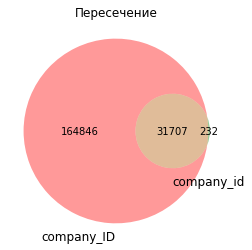

In [ ]:
first_id = set(df_comapny_a_roads['company_ID'].dropna().unique())
second_id = set(df_comapny_a_roads['company_id'].dropna().unique())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company_ID', 'company_id'))

# Отображаем график
plt.title("Пересечение")
plt.show()


* Выведем информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [ ]:
for i in [df_acquisition, df_comapny_a_roads, df_people, df_education, df_degrees]:
    display(i.head())
    i.info()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.00,NaN
1,100,Peter,Lester,27.00,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN
3,10000,Neil,Capel,"2,526.00",NaN
4,100000,Sue,Pilsch,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


##### Изменение типов данных в таблицах
- **Таблица `df_acquisition`**: Преобразовать тип данных в столбце `acquired_at` к типу `date`.
- **Таблица `df_company_a_roads`**: Привести столбцы `founded_at`, `closed_at` и `funded_at` к типу `date`.
- **Таблица `df_education`**: Преобразовать тип данных в столбце `graduated_at` к типу `date`.

### 1.2. Смена типов и анализ пропусков


* Приведем необходимы столбцы к типу данных 'date'

In [ ]:
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])
df_comapny_a_roads[['founded_at', 'closed_at', 'funded_at']] = df_comapny_a_roads[['founded_at', 'closed_at', 'funded_at']].apply(pd.to_datetime)
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'])


* Оценим полноту данных и сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

In [ ]:
for i in [df_acquisition, df_comapny_a_roads, df_people, df_education, df_degrees]:
    print(i.info())
    print(i.isna().sum())
    print(i.isna().sum()/i.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB
None
id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64
id                     0.00
acquiring_company_id   0.00
acquired_company_id    0.00
term_code              0.81
price_amount           0.00
acquired_at            0.00

- В таблице **df_acquisition** всего 9407 строк и 80% пропусков в столбце `term_code`, но в дальнейшем анализе данный столбец не будет играть весомой роли
- Самая большая по количеству строк и столбцов таблица **df_comapny_a_roads** она содержит 217774 строки и 22 столбца
    - В столбцах `funding_round_id`,`company_id,funded_at`,`funding_round_type`, `raised_amount`,`pre_money_valuation`,`participants`,`is_first_round`,`is_last_round` - 75% пропусокв
    - В столбцах `category_code`- 33%, `founded_at` - 50%, `closed_at` - 98%, `domain` - 32%, `network_username` - 56%, `country_code ` - 50%
- В таблице **df_people** всего 226709 строк около 80% пропусков в столбцах `company_id`, `network_username`
- В таблице **df_education** всего 109610 строк и 50% пропусков в столбце `graduated_at`
- В таблице **df_degrees** всего 109610 строк и пропуски в столбцах `degree_type`- 10%, `subject`-25%

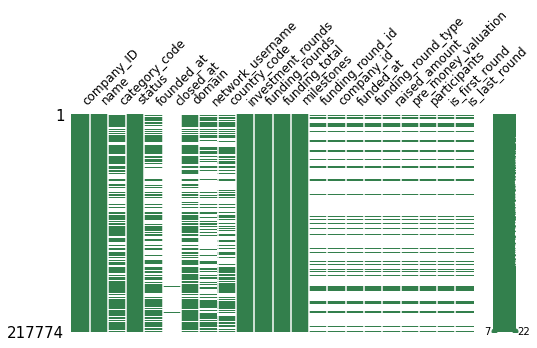

In [ ]:
# Визуализируем пропуски в таблице 'df_comapny_a_roads'
msno.matrix(df_comapny_a_roads, figsize=(8, 4), color=(0.2, 0.5, 0.3), fontsize=12);

После визуализации пропусков в таблице `df_comapny_a_roads` можно заметить, что пропуски в столбцах 'funding_round_id', 'company_id', 'funded_at', 'funding_round_type','raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round' распределены одинаково. Это может быть связано с тем, что определенные компании не участвовали в финансировании.

Так как данных в каждой таблице достаточное количество, то пропуски, которые присутствуют во многих таблицах можно игнорировать, так как данных для анализа все еще достаточно

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам
* Проанализируем данные из company_and_rounds.csv, составим сводную таблицу по годам для оценки типичного размера средств и количества раундов.

* На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответим на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [ ]:
# Выделим из даты `funded_at` год
df_comapny_a_roads['funded_year'] = df_comapny_a_roads['funded_at'].dt.year.astype('Int64')
df_comapny_a_roads.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00,2005
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00,2007
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00,2008
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [ ]:
# С помощью groupby составим сводную таблицу
pivot_comapny_a_r = df_comapny_a_roads.groupby('funded_year').agg({'funding_round_id': 'nunique' , 'raised_amount': 'median'}).reset_index()
# Выделем года с более чем 50 раундами финансирования
pivot_comapny_a_r = pivot_comapny_a_r[pivot_comapny_a_r['funding_round_id'] > 50]
pivot_comapny_a_r

,funded_year,funding_round_id,raised_amount
15,1999,76,"2,000,000.00"
16,2000,125,"4,200,000.00"
17,2001,96,"3,000,000.00"
18,2002,116,"4,200,000.00"
19,2003,159,"3,000,000.00"
20,2004,291,"5,000,000.00"
21,2005,1633,"5,500,000.00"
22,2006,2436,"5,000,000.00"
23,2007,3279,"3,973,320.00"
24,2008,3774,"3,110,000.00"


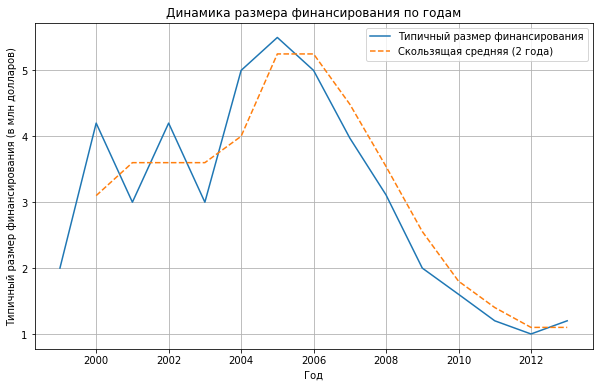

In [ ]:
# Переводим raised_amount в миллионы долларов для читаемости
pivot_comapny_a_r['raised_amount_millions'] = pivot_comapny_a_r['raised_amount'] / 1e6

# Вычисляем скользящую среднюю
pivot_comapny_a_r['rolling_mean'] = pivot_comapny_a_r['raised_amount_millions'].rolling(window=2).mean()

# Строим линейный график
plt.figure(figsize=(10, 6))
plt.plot(pivot_comapny_a_r['funded_year'], pivot_comapny_a_r['raised_amount_millions'], label='Типичный размер финансирования')
plt.plot(pivot_comapny_a_r['funded_year'], pivot_comapny_a_r['rolling_mean'], label='Скользящая средняя (2 года)', linestyle='--')

plt.xlabel('Год')
plt.ylabel('Типичный размер финансирования (в млн долларов)')
plt.title('Динамика размера финансирования по годам')
plt.legend()
plt.grid(True)
plt.show()

- В 2005 году типичный размер собранных за один раунд был максимален
- В 2013 году было число раундов и размер финансирования выросли по сравнению с прошлым годом


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.


In [ ]:
# Объединим таблицы 'df_people' и 'df_education'
df_mer_ep = df_people.merge(df_education, left_on = 'id', right_on = 'person_id',  how = 'left', suffixes = ('_people','_education'))
# Так как нам важно посчитать количесвто сотрудников с образованием, то людей с двумя и
# более образованиями можно удалить из рассматриваемого датафрейма
df_mer_ep = df_mer_ep.drop_duplicates(subset=['first_name', 'last_name', 'person_id', 'company_id'])
df_mer_ep.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
# Сгрупируем столбцы
df_grouped_ep = df_mer_ep.groupby('company_id', as_index=False)['id_people'].count()
df_grouped_ep.rename(columns={'id_people': 'employee_count'}, inplace=True)
# Объединим таблицы
df_mer_ep = df_mer_ep.merge(df_grouped_ep, on='company_id', how='left')
# Сортируем значения по убыванию количества сотрудников в компании
df_mer_ep.sort_values(by='employee_count', ascending=False)

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,employee_count
182830,57913,David,Krane,59.00,kraneland,"69,501.00","57,913.00",Indiana University Bloomington,1994-01-01,244.00
187498,6297,Marissa,Mayer,59.00,marissamayer,718.00,"6,297.00",Stanford University,1997-01-01,244.00
65392,179177,Nima,Rahnemoon,59.00,nimstr,NaN,NaN,NaN,NaT,244.00
65574,179353,Raj,Sarkar,59.00,NaN,NaN,NaN,NaN,NaT,244.00
189056,646,Aaron,Dunn,59.00,NaN,711.00,646.00,Skidmore College,2006-01-01,244.00
...,...,...,...,...,...,...,...,...,...,...
220078,99994,Kiran,Manda,NaN,NaN,"102,502.00","99,994.00",University of Louisiana,NaT,NaN
220079,99995,Sue,Gench,NaN,NaN,NaN,NaN,NaN,NaT,NaN
220080,99996,Rick,Tamberrino,NaN,tamberrino,NaN,NaN,NaN,NaT,NaN
220082,99998,Adam,Neumann,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [ ]:
# Разделяем компании на 6 групп по количеству сотрудников
df_mer_ep['df_group_ep'] = pd.cut(df_mer_ep['employee_count'], bins = [0, 1, 2, 3, 5, 10, 23, float('inf')], labels = ['1', '2', '3', '3-5', '5-10', '11-23','25+'])
df_mer_ep.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,employee_count,df_group_ep
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,61.00,25+
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,10.00,5-10
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,3.00,3
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,2.00,2
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


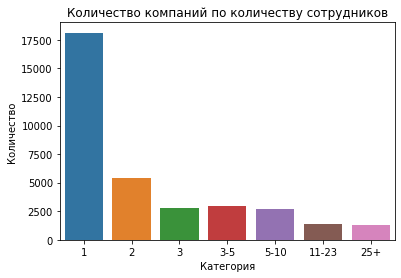

In [ ]:
# Посторим график для отображения распределения сотрудников
sns.countplot(x='df_group_ep', data=df_mer_ep)

# Добавление подписей и заголовка
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Количество компаний по количеству сотрудников')

plt.show()

In [ ]:
# Фильтруем сотрудников, у которых нет информации об образовании
df_group_ep_e = df_mer_ep[df_mer_ep['id_education'].isna()]
df_group_ep_e.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,employee_count,df_group_ep
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,10.00,5-10
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,3.00,3
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,2.00,2
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
# Группируем по категориям компаний и считаем количество сотрудников без образования для каждой группы.
df_group_ep_enn = df_group_ep_e.groupby('df_group_ep')['id_people'].count()
df_group_ep_enn

df_group_ep
1        8384
2        2519
3        1345
3-5      1488
5-10     1422
11-23     632
25+       356
Name: id_people, dtype: int64

In [ ]:
# Группируем данные по категориям компаний и считаем общее количество сотрудников в каждой группе.
df_group_ep_we = df_mer_ep.groupby('df_group_ep')['id_people'].count()
df_group_ep_we

df_group_ep
1        18120
2         5412
3         2763
3-5       2983
5-10      2664
11-23     1375
25+       1293
Name: id_people, dtype: int64

In [ ]:
#Рассчитываем долю сотрудников без образования в каждой группе
df_group_ep_enn/df_group_ep_we*100

df_group_ep
1       46.27
2       46.54
3       48.68
3-5     49.88
5-10    53.38
11-23   45.96
25+     27.53
Name: id_people, dtype: float64

- Все сотрудники были разделены на 6 групп, границы групп брались таким образом, чтобы у каждой было примерно равное количество сотрудников, но из-за достаточно большого количества сотрудников(1) получилось, что в первой группе значение намного превосходит остальные.
- Тем не менее в каждой из групп, получилось примерно равный процент сотрудников без информации об образовании - около 50%

Также к этим данным присоединить таблицу degrees.csv для более подробно анализа информации об образовании, если бы это было необходимо. Можно было бы присоединить по столбцу `object_id`, предварительно его обработав, убрав буквы в id сотрудника

### 2.3. Объединять или не объединять — вот в чём вопрос

* Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [ ]:
# Загрузим датасет 'df_fund'
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

In [ ]:
# Удалим дубликаты в датасетах
df_fund_dup = df_fund.drop_duplicates(subset='network_username')
df_people_dup = df_people.drop_duplicates(subset='network_username')
df_comapny_a_roads_dup = df_comapny_a_roads.drop_duplicates(subset='network_username')

In [ ]:
# Объединим необходимые таблицы
df_comb1 = pd.merge(df_fund_dup, df_people_dup, on = 'network_username', how = 'outer')
df_comb2 = pd.merge(df_comb1, df_comapny_a_roads_dup, on = 'network_username', how = 'outer')
df_comb2.head()

,id_x,name_x,founded_at_x,domain_x,network_username,country_code_x,investment_rounds_x,invested_companies,milestones_x,id_y,...,funding_round_id,company_id_y,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,"13,131.00",NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,10.00,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1,1.00,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307.00,196.00,0.00,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
2,"10,015.00",IMI.VC,2011-07-31,imi.vc,imi_vc,RUS,2.00,2.00,4.00,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
3,"1,002.00",Alven Capital,2000-01-01,alvencapital.com,alvencap,FRA,43.00,36.00,1.00,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,"10,020.00",East Valley Ventures,2011-01-01,eastvalleyventures.com,EastValleyVent,CAN,2.00,2.00,0.00,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [ ]:
# Считаем количество дубликатов в итоговой таблице
df_comb2_dupl_count = df_comb2.duplicated().sum()
print("Количество дубликатов в итоговом датафрейме: ", df_comb2_dupl_count)

Количество дубликатов в итоговом датафрейме:  0


In [ ]:
# Извлекаем уникальные network_username из каждой таблицы
people_users = set(df_people['network_username'].dropna().unique())
company_users = set(df_comapny_a_roads['network_username'].dropna().unique())
fund_users = set(df_fund['network_username'].dropna().unique())

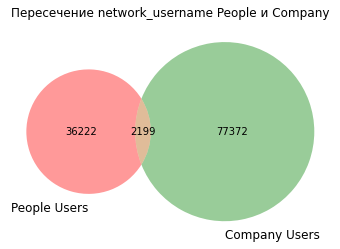

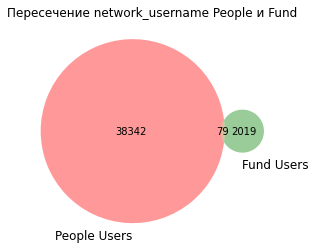

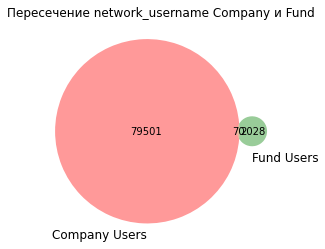

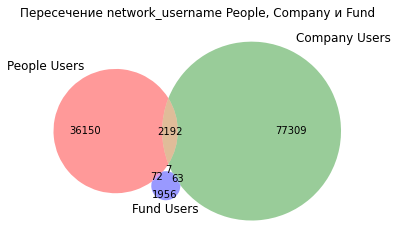

In [ ]:
# people_df и company_rounds
venn2([people_users, company_users], set_labels=('People Users', 'Company Users'))
plt.title("Пересечение network_username People и Company")
plt.show()

# people_df и fund
venn2([people_users, fund_users], set_labels=('People Users', 'Fund Users'))
plt.title("Пересечение network_username People и Fund")
plt.show()

# company_rounds и fund
venn2([company_users, fund_users], set_labels=('Company Users', 'Fund Users'))
plt.title("Пересечение network_username Company и Fund")
plt.show()

# Сравнение всех трёх таблиц
venn3([people_users, company_users, fund_users], set_labels=('People Users', 'Company Users', 'Fund Users'))
plt.title("Пересечение network_username People, Company и Fund")
plt.show()

- После того как были объединены необходимые таблицы количество дубликатов стало равно 0, из этого можно сделать вывод, что информация по данному столбцу `network_username` для разных таблиц не дублируется.
- Благодаря диаграммам становится видно, что пересечений 'user_name' между таблицами `df_comapny_a_roads` и `df_people`всего 2199, что относительно общего числа обеих таблиц достаточно мало. Между оставшимся таблицами пересечения также очень малые.
- А значит, данный столбец нежелательно использовать для объединения данных.


### 2.4. Проблемный датасет и причина возникновения пропусков

* На данном этапе поработаем с таблицей 'df_comapny_a_roads', максимальным образом сохраняя данные, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [ ]:
# Таблица компаний
df_companies = df_comapny_a_roads[[
    'company_ID', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
    'domain', 'network_username', 'country_code', 'investment_rounds',
    'funding_rounds', 'funding_total', 'milestones'
]].reset_index(drop=True)

# Таблица раундов
df_rounds = df_comapny_a_roads[[
    'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round',
    'is_last_round'
]].reset_index(drop=True)

In [ ]:
# Удаление дубликатов в таблице компаний
df_companies = df_companies.drop_duplicates(subset=['company_ID']).reset_index(drop=True)
df_rounds = df_rounds.drop_duplicates(subset=['company_id']).reset_index(drop=True)

In [ ]:
display(df_companies)
display(df_rounds)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
3,"10,000.00",MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.00,0.00,0.00,0.00
4,"10,001.00",THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,"3,429.00",Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,"44,000,000.00",6.00
196550,"7,748.00",Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,"1,300,000.00",3.00
196551,"174,536.00",Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.00,0.00,0.00,0.00
196552,"43,233.00",Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.00,3.00,"57,500,000.00",3.00


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,644.00","1,001.00",2008-02-26,series-a,"5,000,000.00",0.00,3.00,1.00,1.00
3,"6,682.00","10,014.00",2008-09-01,angel,0.00,0.00,1.00,1.00,1.00
4,"3,619.00","10,015.00",2008-10-10,series-a,"2,000,000.00",0.00,2.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...
31935,"56,184.00","146,919.00",2013-11-06,other,"4,900,000.00",0.00,0.00,1.00,1.00
31936,"56,454.00","282,847.00",2011-01-31,other,"5,500,000.00",0.00,0.00,1.00,1.00
31937,"56,542.00","55,477.00",2011-01-13,venture,"10,633,300.00",0.00,0.00,0.00,1.00
31938,"56,928.00","283,492.00",2013-12-03,venture,"3,602,480.00",0.00,5.00,1.00,1.00


Так как таблица `df_comapny_a_roads` была получена в результате объедеинения двух других таблиц, сложно сделать разделение ее на эти две таблицы, чтобы в одной(`df_companies`) была информация о компаниях, а в другой(`df_rounds`) информация о раундах финансирования


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.


In [ ]:
# Отбираем нужные строки
df_merged_3 = df_companies[(((~df_companies['funding_rounds'].isna()) & (df_companies['funding_rounds'] > 0)) | (df_companies['investment_rounds'] > 0)) | (df_companies['status'] == 'acquired')]
df_merged_3

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
13,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,"5,000,000.00",3.00
18,"10,014.00",Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196544,"1,344.00",Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.00,1.00,"10,000,000.00",0.00
196545,"142,181.00",Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.00,1.00,"500,000.00",1.00
196549,"3,429.00",Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,"44,000,000.00",6.00
196550,"7,748.00",Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,"1,300,000.00",3.00



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

In [ ]:
df_merged_3['funding_total'].describe()

count          40,747.00
mean       10,135,609.64
std        56,464,359.98
min                 0.00
25%                 0.00
50%           600,000.00
75%         5,650,650.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

Так как в данных слишком много выбросов, то при построении графиков в обычном формате, нельзя точно определить значения, поэтому построим графики в логарифмическом масштабе, чтобы более корректно увидеть распределение

<AxesSubplot:ylabel='log_funding'>

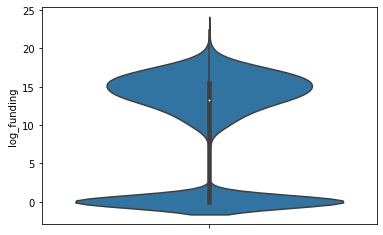

In [ ]:
df_merged_3 = df_merged_3.copy()  # Явно создаем копию
# Переведем данные из столбца 'funding_total' в логарифм
df_merged_3['log_funding'] = np.log1p(df_merged_3['funding_total'])  # log(1 + x), чтобы избежать log(0)
# Посторим'скрипичный график'
sns.violinplot(data=df_merged_3, y='log_funding')

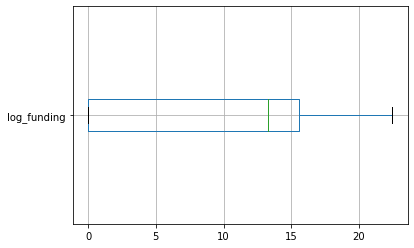

In [ ]:
# Построим диаграмму 'ящик с усами'
boxplot = df_merged_3.boxplot(column='log_funding',
                     vert=False,
                     figsize=(6, 4))

In [ ]:
df_merged_3['log_funding'].describe()

count   40,747.00
mean         9.99
std          7.03
min          0.00
25%          0.00
50%         13.30
75%         15.55
max         22.46
Name: log_funding, dtype: float64

In [ ]:
med_fund = np.expm1(13.3)  # Среднее
low = np.expm1(0)  #25%
up = np.expm1(15.55)  #75%
gran = np.expm1(15.55)  # Граница

print(f"Типичное финансирование: {med_fund:,.0f}")
print(f"Нормальный диапазон: {low:,.0f} - {up:,.0f}")
print(f"Выбросы начинаются от: {gran:,.0f}")

Типичное финансирование: 597,195
Нормальный диапазон: 0 - 5,666,033
Выбросы начинаются от: 5,666,033


- Типичный размер общего финансирования находится в диапазоне от 0 до 5,600,000.
- Начиная с 5,600,000 размер финансирования будет выбивающимся для многих компаний


### 3.3. Куплены забесплатно?

* Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.


In [ ]:
# Объединим таблицы 'df_acquisition' и 'df_acquisition'
df_merged_ac = df_acquisition.merge(df_merged_3, left_on = 'acquired_company_id', right_on = 'company_ID', how = 'left')
# Выделим таблицу, согласно условию
df_merged_ac_3 = df_merged_ac[((df_merged_ac['price_amount'] == 1) | (df_merged_ac['price_amount'] == 0)) & (df_merged_ac['funding_total'] > 0)]
df_merged_ac_3

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,log_funding
7,14,318,314,cash,0,2006-10-01,314.00,Reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0.00,1.00,"100,000.00",3.00,11.51
49,65,146,698,cash,0,2007-08-01,698.00,Maya's Mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0.00,1.00,"1,000,000.00",2.00,13.82
51,67,156,718,cash,0,2007-08-01,718.00,Glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0.00,1.00,"4,000,000.00",0.00,15.20
65,87,1035,175,cash,0,2007-10-01,175.00,Newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0.00,1.00,"1,250,000.00",0.00,14.04
85,115,396,1582,cash,0,2007-12-01,"1,582.00",BeliefNet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0.00,1.00,"7,000,000.00",3.00,15.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9363,10481,29,165128,NaN,0,2013-12-06,"165,128.00",EvntLive,music,acquired,NaT,NaT,evntliveinc.com,EVNTLIVE,USA,0.00,1.00,"2,300,000.00",2.00,14.65
9382,10500,42365,79582,NaN,0,2013-12-10,"79,582.00",lucierna,software,acquired,2009-05-22,NaT,lucierna.com,lucierna_inc,ESP,0.00,1.00,"2,106,600.00",0.00,14.56
9385,10503,1434,60436,NaN,0,2013-12-10,"60,436.00",Cloudmeter,enterprise,acquired,2007-04-01,NaT,cloudmeter.com,cloudmeter,USA,0.00,1.00,"5,000,000.00",2.00,15.42
9388,10507,29,169154,NaN,0,2013-12-09,"169,154.00",Quik.io,software,acquired,2011-02-03,NaT,quik.io,quik_io,USA,0.00,2.00,"1,280,000.00",2.00,14.06


In [ ]:
# Рассчитаем верхнюю и нижнюю границу с помощью IQR
# Вычислим квартили Q1 и Q3
Q1 = df_merged_ac_3['funding_total'].quantile(0.25)
Q3 = df_merged_ac_3['funding_total'].quantile(0.75)
# Вычислим IQR
IQR = Q3 - Q1
up_bound = Q3 + 1.5*IQR
low_bound = Q1 - 1.5*IQR
print(f"Нижняя граница выбросов: {low_bound:,.0f}")
print(f"Верхняя граница выбросов: {up_bound:,.0f}")

Нижняя граница выбросов: -18,250,000
Верхняя граница выбросов: 35,750,000


In [ ]:
# С помощью функции percentileofscore вычислим каким перцентилям соответствуют рассчитанные значения
low_per = percentileofscore(df_merged_ac_3['funding_total'], low_bound, kind='rank')
up_per = percentileofscore(df_merged_ac_3['funding_total'], up_bound, kind='rank')

print(f"Нижняя граница выбросов ({low_bound:,.2f}) соответствует приблизительно {low_per:.2f}-му процентилю")
print(f"Верхняя граница выбросов ({up_bound:,.2f}) соответствует приблизительно {up_per:.2f}-му процентилю")


Нижняя граница выбросов (-18,250,000.00) соответствует приблизительно 0.00-му процентилю
Верхняя граница выбросов (35,750,000.00) соответствует приблизительно 90.91-му процентилю


In [ ]:
df_merged_ac_3['funding_total'].describe()

count           1,618.00
mean       18,152,961.94
std       144,503,027.47
min             3,750.00
25%         2,000,000.00
50%         6,000,000.00
75%        15,500,000.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

- Значения, рассчитанные по перцентилям будут лучше подходить для рассматриваемых данных

Так как в данных присутствует большое количество выбросов, а также сильный разброс значений(стандартное отклонение 144 млн), то границы рассчитанные с помощью метода IQR не совсем корректны (нижняя граница получилась отрицательной). Поэтому взять значения, рассчитанные по перцентилям будет более правильным решением.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.


In [ ]:
# Сгрупируем данные по 'category_code' и найдем 'mean', 'std', 'count'
df_group_cat = df_merged_ac.groupby('category_code')['price_amount'].agg(['median', 'std', 'count']).reset_index()
# Отфильтруем категории, в которых больше 5 сделок
df_group_cat = df_group_cat[(df_group_cat['count'] > 5) & (df_group_cat['category_code'] != 'other')]
top_price = df_group_cat[['category_code', 'median']].sort_values(ascending = False, by = 'median').head(5)
top_std = df_group_cat[['category_code', 'std']].sort_values(ascending = False, by = 'std').head(5)

In [ ]:
# people_df и company_rounds
top_price_t = set(top_price['category_code'])
top_std_t = set(top_std['category_code'])
in_set = top_price_t & top_std_t

#Создание таблица для пересечения
in_df = df_group_cat[df_group_cat['category_code'].isin(in_set)][['category_code', 'median', 'std']]

Категории с высокой средней ценой (ТОП-5):


,category_code,median
18,manufacturing,72000000
30,real_estate,50000000
3,biotech,13200000
15,hospitality,12500000
11,finance,600000



Категории с высоким разбросом цен (ТОП-5):


,category_code,std
9,enterprise,"128,088,235,060.17"
29,public_relations,"4,059,244,205.05"
30,real_estate,"2,505,122,913.06"
3,biotech,"1,540,373,521.41"
14,health,"1,249,084,287.10"



Категории, которые попали в оба списка (и высокая средняя, и высокий std):


,category_code,median,std
3,biotech,13200000,"1,540,373,521.41"
30,real_estate,50000000,"2,505,122,913.06"


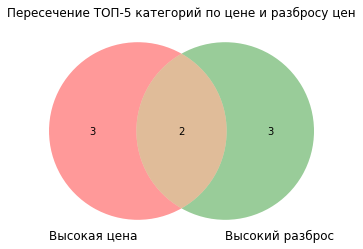

In [ ]:
print("Категории с высокой средней ценой (ТОП-5):")
display(top_price)

print("\nКатегории с высоким разбросом цен (ТОП-5):")
display(top_std)

print("\nКатегории, которые попали в оба списка (и высокая средняя, и высокий std):")
display(in_df)
# Псотроим график
venn2([top_price_t, top_std_t], set_labels=('Высокая цена', 'Высокий разброс'))
plt.title("Пересечение ТОП-5 категорий по цене и разбросу цен")
plt.show()

- Было выбрано топ-5 категорий, так как данное количество является оптимальным, медиана показывет в каких категориях самая высокая цена на стартапы, а стандартное отклонение показывает разброс цен.
- Были исключены категории с менее чем 5 сделками, так как расчитанные `median` и `std` могли быть некорректны и исказить анализ.
- Была создана дополнительная таблица с пересечением, чтобы выделить наиболее привлекательные категории по обоим пунктам


### 3.5. Сколько раундов продержится стартап перед покупкой

* Проанализируем столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [ ]:
df_merged_3['funding_rounds'].describe()

count   40,747.00
mean         1.29
std          1.26
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         15.00
Name: funding_rounds, dtype: float64

In [ ]:
df_group_st = df_merged_3.groupby('status')['funding_rounds'].mean().reset_index()

<Figure size 576x432 with 0 Axes>

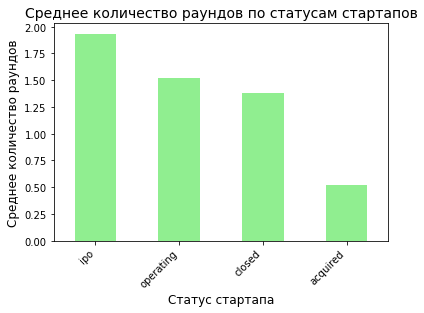

,status,funding_rounds
0,acquired,0.52
1,closed,1.38
2,ipo,1.93
3,operating,1.52


In [ ]:
plt.figure(figsize=(8, 6))
df_group_st.sort_values(ascending = False, by = 'funding_rounds').plot(kind='bar', x='status', y='funding_rounds', legend=False, color='lightgreen')

# Добавляем заголовок, подписи осей
plt.title('Среднее количество раундов по статусам стартапов', fontsize=14)
plt.xlabel('Статус стартапа', fontsize=12)
plt.ylabel('Среднее количество раундов', fontsize=12)

# Разворачиваем подписи для лучшей читаемости
plt.xticks(rotation=45, ha='right')

# Показываем график
plt.show()

df_group_st

- IPO-компании проходят больше всего раундов (1.93), а приобретенные —  меньше всех (0.52).
- Это может говорить о том, что успешные стартапы проходят больше раундов перед выходом на IPO, а приобретенные компании продаются на ранних стадиях.


## Шаг 4. Итоговый вывод и рекомендации

В ходе анализа данных для финансовой компании, планирующей инвестировать в стартапы, были получены важные выводы для принятия инвестиционных решений.

### Основные выводы:

1. **Анализ раундов финансирования**
   - Максимальные размеры средств в одном раунде наблюдались в 2005 году.
   - В 2013 году наблюдается рост числа раундов и размеров финансирования, что указывает на больший интерес инвесторов.
   - Общее количество раундов финансирования увеличивалось с годами, что подтверждает тенденцию роста рынка.
2. **Информация о сотрудниках**
   - Образование сотрудников недостаточно полно, особенно в крупных компаниях.
3. **Объединение данных**
   - Анализ показал, что столбец `network_username` не подходит для объединения данных.
4. **Анализ выбросов**
   - Были выявлены выбросы в размерах общего финансирования, для которых использовались перцентильные значения, так как из-за большого количества выбросов метод IQR раюотает некорректно.
   - Типичные суммы финансирования варьируются от 0 до 5,6 миллионов.
5. **Цены стартапов по категориям**:
   - Самыми привлекательными для инвесторов являются стартапы с высокими ценами и значительным разбросом цен: `biotech` и `real_estate`.
6. **Количество раундов для разных статусов стартапов**:
   - Стартапы, прошедшие IPO, в среднем проходят больше раундов (1.93), в отличие от приобретенных стартапов (0.52).

### Рекомендации:

- Инвесторы должны обратить внимание на стартапы с несколькими раундами финансирования и подготовкой к IPO, так как они могут иметь больше шансов на успешное развитие.
- Важно учитывать выбросы в финансировании, используя перцентильные значения для более точной оценки стартапов.

### Заключение:

Анализ показал, что успешные стартапы проходят больше раундов и имеют высокие шансы на успешное завершение IPO. Стартапы, приобретенные на ранних стадиях, обычно проходят меньше раундов.
